**Business Problem**

A company aims to start a new movie studio and wants to compete with major studios in creating original content. They lack insight into which types of films perform best at the box office and need data-driven recommendations to make informed production decisions.


**Objectives**

1.  To find which Movies perform best.

2.  To find the most popular genre to invest in.

3. To find the effect of popularity on the profit.

4. To find the effect of production budget on the profit.


**Data**

The following are the datasets we used for our analysis;

*tmdb.movies.csv*

*tn.movie_budgets.csv*

*im.db*

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

In [2]:
# loading our data from the movies budget dataset.
df_budget = pd.read_csv('/content/tn.movie_budgets.csv')
df_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [3]:
# viewing our dataset
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**Dataset 2:**
tmdb.movies.csv

In [4]:
# Loading the movies dataset
df_movies = pd.read_csv('/content/tmdb.movies.csv')
# Preview of the first five rows
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# Short summary of the data
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


**Data cleaning**

This section outlines the necessary modifications for preparing the data, including handling missing values, selecting relevant columns, merging datasets, and ensuring data consistency. These steps are crucial for effective analysis and visualization, enabling accurate insights and informed decision-making.

In [6]:
#converting column datatypes to integer
integer_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
df_budget[integer_cols] = df_budget[integer_cols].replace('[\$,]', '', regex = True).astype(int)

In [7]:
# checking the dataset again to confirm change of datatype
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [8]:
# Creating a new column for foreign gross
df_budget['Foreign_gross'] = df_budget['worldwide_gross'] - df_budget['domestic_gross']
df_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1369318718
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,654000000
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,426920914
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,679546748


In [9]:
# Renaming the column for easier merging
df_budget.rename(columns = {'movie': 'title'}, inplace = True)

In [10]:
# checking the budget dataset column names
df_budget.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'Foreign_gross'],
      dtype='object')

In [11]:
# checking the movies dataset column names
df_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [12]:
# checking for duplicates in the title column in the budget dataset
df_budget['title'].duplicated().any()

True

In [13]:
# Dropping the duplicates to increase accuracy, reliability and data quality.
df_budget.drop_duplicates(subset = ['title'], inplace = True)

In [14]:
# checking for duplicates in the title column in the movies dataset
df_movies['title'].duplicated().any()

True

In [15]:
# Dropping the duplicates to increase accuracy, reliability and data quality.
df_movies['title'].drop_duplicates(inplace = True)

In [16]:
# confirming there are no duplicates
df_movies.duplicated().any()

False

In [17]:
# merging the budget dataframe and and movies dataframe
Merged= pd.merge(df_budget, df_movies[['title', 'popularity', 'vote_average', 'vote_count']],
                 on = 'title', how = 'inner')
# Preview of the first five rows in the merged dataset
Merged.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,Foreign_gross,popularity,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,26.526,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,30.579,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,44.383,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1369318718,80.773,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,426920914,34.953,6.2,7510


In [18]:
# Short summary of the merged dataset
Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296 entries, 0 to 2295
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2296 non-null   int64  
 1   release_date       2296 non-null   object 
 2   title              2296 non-null   object 
 3   production_budget  2296 non-null   int64  
 4   domestic_gross     2296 non-null   int64  
 5   worldwide_gross    2296 non-null   int64  
 6   Foreign_gross      2296 non-null   int64  
 7   popularity         2296 non-null   float64
 8   vote_average       2296 non-null   float64
 9   vote_count         2296 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 179.5+ KB


In [19]:
# checking for duplicates
Merged.duplicated().any()

True

In [20]:
# Dropping duplicates in our dataset to increase accuracy, reliability and data quality.
Merged.drop_duplicates(inplace = True)

In [21]:
# confirming that we have dropped the duplicates
Merged.duplicated().any()

False

In [22]:
# Short summary of the dataset
Merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2295
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2126 non-null   int64  
 1   release_date       2126 non-null   object 
 2   title              2126 non-null   object 
 3   production_budget  2126 non-null   int64  
 4   domestic_gross     2126 non-null   int64  
 5   worldwide_gross    2126 non-null   int64  
 6   Foreign_gross      2126 non-null   int64  
 7   popularity         2126 non-null   float64
 8   vote_average       2126 non-null   float64
 9   vote_count         2126 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 182.7+ KB


In [23]:
# Dropping duplicates based on the title column to increase accuracy, reliability and data quality.
Merged.drop_duplicates(subset = ['title'], inplace = True)

In [24]:
# preview of the last ten rows in the dataset
Merged.tail(10)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,Foreign_gross,popularity,vote_average,vote_count
2284,33,"Mar 31, 2012",Foreign Letters,40000,0,0,0,0.600,5.3,3
2285,35,"Oct 25, 2013",Her Cry: La Llorona Investigation,35000,0,0,0,0.600,5.0,2
2286,36,"Dec 31, 2014",Happy 40th,35000,0,0,0,0.600,6.0,2
2287,38,"Mar 18, 2016",Krisha,30000,144822,144822,0,0.600,9.0,1
2290,45,"Jan 27, 2017",Emily,27000,3547,3547,0,0.600,7.0,1
2291,49,"Sep 1, 2015",Exeter,25000,0,489792,489792,5.934,4.7,121
2292,51,"Apr 21, 2015",Ten,25000,0,0,0,1.575,5.4,5
2293,54,"Dec 31, 2014",Dry Spell,22000,0,0,0,0.600,6.0,1
2294,56,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,0,2.078,3.9,19
2295,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,0,1.973,5.4,7


In [25]:
# confirming the number of rows and columns in our dataset
Merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, 0 to 2295
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1924 non-null   int64  
 1   release_date       1924 non-null   object 
 2   title              1924 non-null   object 
 3   production_budget  1924 non-null   int64  
 4   domestic_gross     1924 non-null   int64  
 5   worldwide_gross    1924 non-null   int64  
 6   Foreign_gross      1924 non-null   int64  
 7   popularity         1924 non-null   float64
 8   vote_average       1924 non-null   float64
 9   vote_count         1924 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 165.3+ KB


In [26]:
# creating the profit column
Merged['worldwide_Profit'] = Merged['worldwide_gross'] - Merged['production_budget']
Merged.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,Foreign_gross,popularity,vote_average,vote_count,worldwide_Profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,26.526,7.4,18676,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,30.579,6.4,8571,635063875
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,44.383,7.3,13457,1072413963
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1369318718,80.773,8.3,13948,1748134200
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,426920914,34.953,6.2,7510,355945209


**Visualization**

This section emphasizes on the creation of visual representations to make complex data more accessible. We used graphs such as bar graphs, barh graphs, scatter plots and heatmaps, the visualizations help communicate insights clearly to a non-technical audience.

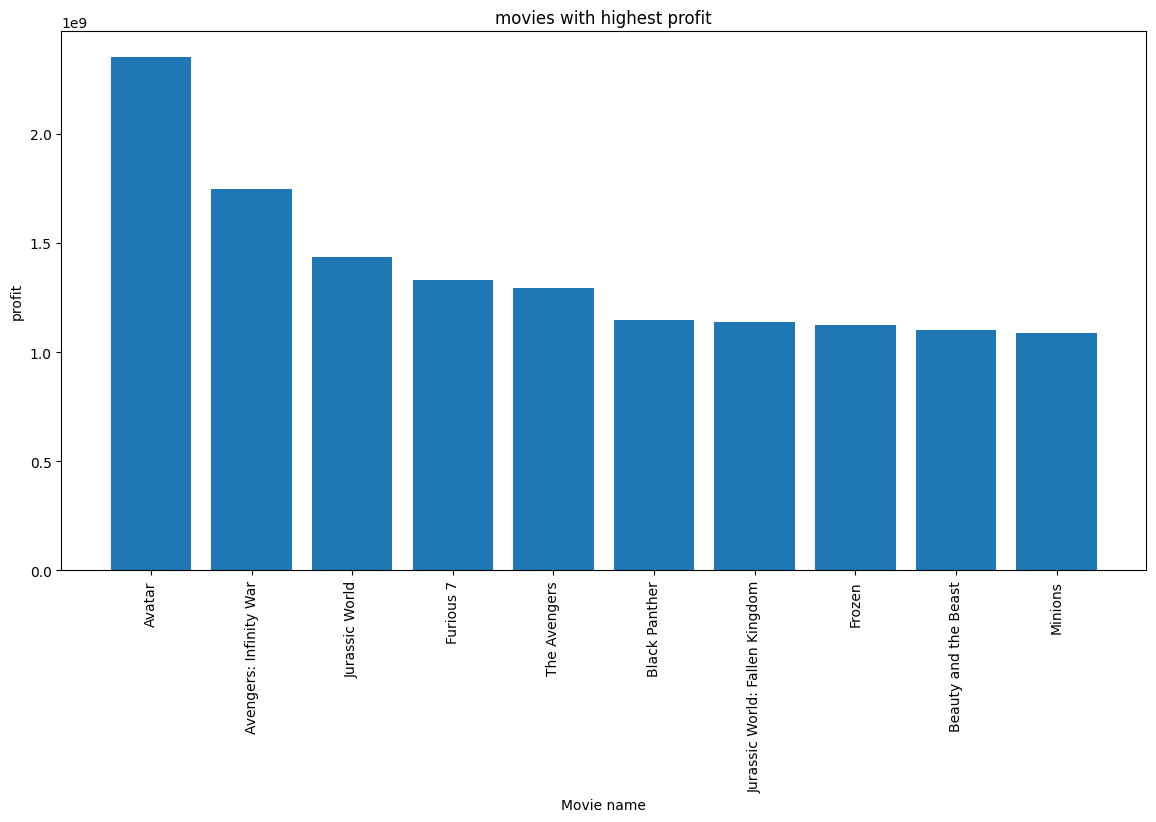

In [27]:
#plotting graph for the movies with highest profit
plt.figure(figsize = (14, 7))
top_movies = Merged.nlargest(10, 'worldwide_Profit')
plt.bar(top_movies['title'], top_movies['worldwide_Profit'])
plt.title('movies with highest profit')
plt.xticks(rotation = 90)
plt.xlabel('Movie name')
plt.ylabel('profit')

plt.show()

**Observation**


The graph above shows that avatar has the highest profit margin on the worldwide level. However, it alse shows the top ten movies that had higher profit margin than the rest of the movies.

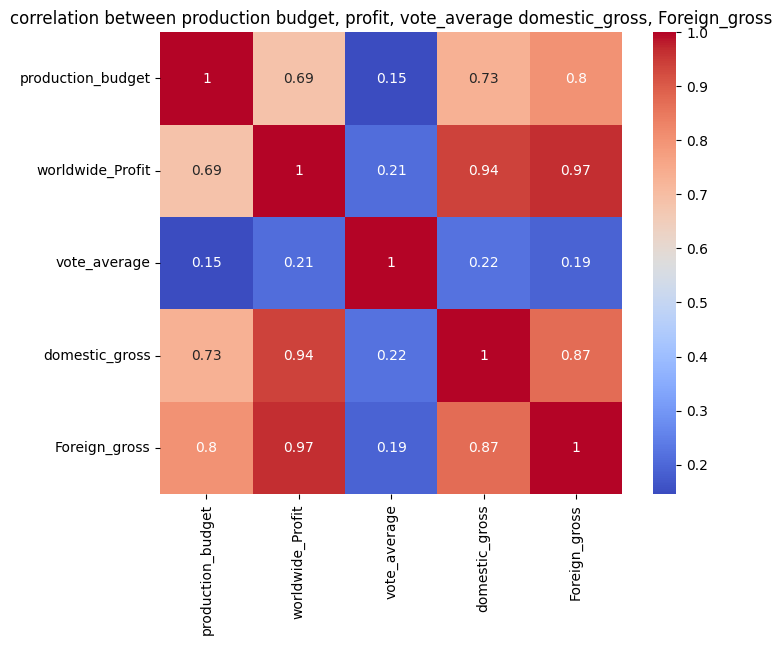

In [28]:
#plotting the correlation between production budget, profit, vote_average domestic_gross and Foreign_gross
plt.figure(figsize = (8, 6))
correlation = Merged[['production_budget', 'worldwide_Profit', 'vote_average', 'domestic_gross', 'Foreign_gross']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', square =  True)
plt.title('correlation between production budget, profit, vote_average domestic_gross, Foreign_gross')
plt.show()

**Observation**

The graph above shows the correlation between production_budget, worldwide_Profit, vote_average, domestic_gross and Foreign_gross. From the heatmap we can conclude that there is a strong correlation between production budget and domestic gross.

 This indicates that there is a stronger linear relationship between the two which means that as the production budget increases the domestic gross increases too.

**Database Analysis**


*im.db*   database was used in the analysis to support statistical evaluation of which movie is the best, based on ratings and genres.

Tables used in the database;

*Movie_basics*

*movie_ratings*

In [29]:
# Connecting with the database
conn = sqlite3.connect('/content/im.db')

In [30]:
# Preview of the table names
q = """SELECT name as Table_names FROM sqlite_master WHERE type = 'table';"""
Table_names = pd.read_sql_query(q, conn)
Table_names

,Table_names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [31]:
# Preview of the movie_basics table
df = pd.read_sql_query("""SELECT *FROM movie_basics""", conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [32]:
# preview of the movie_ratings table
df1 = pd.read_sql_query("""SELECT *FROM movie_ratings""", conn)
df1


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In the cell below, we join the tables. This is necessary because the data is stored in separate tables to reduce redundancy, improve organization, and enhance performance. By joining them, we can access related information efficiently and perform a more comprehensive analysis.

In [33]:
# Joining the tables based on common columns
q = """
SELECT movie_basics.primary_title, movie_basics.original_title, movie_basics.start_year, movie_basics.runtime_minutes,
movie_basics.genres, movie_ratings.averagerating, movie_ratings.numvotes
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
"""
basics = pd.read_sql_query(q, conn)
basics

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [34]:
# Getting summary about our data
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [35]:
# statistical summary of the data
basics.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In our cleaning we're going to drop rows with NAN values because they're are a small part(14.3%) our data and that might affect data integrity.

In [36]:
# Dropping th rows with nan values
basics =basics.dropna()

In [37]:
# Confirming that we dropped the NAN values
basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    65720 non-null  object 
 1   original_title   65720 non-null  object 
 2   start_year       65720 non-null  int64  
 3   runtime_minutes  65720 non-null  float64
 4   genres           65720 non-null  object 
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


In [38]:
# checking for duplicates
basics['genres'].duplicated().any()

True

**Dealing with outliers**

In order to minimize the effect of outliers, we plot values within the first and third quantiles.

In [39]:
# lower quantile
Q1 = basics['runtime_minutes'].quantile(0.1)
# upper quantile
Q3 = basics['runtime_minutes'].quantile(0.9)
#interquantile range
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = basics[(basics['runtime_minutes'] >= lower_bound) & (basics['runtime_minutes'] <= upper_bound)]

**Visualization**

Visualization of the correlation between the average rating and movie runtime.

-0.05348450160453834


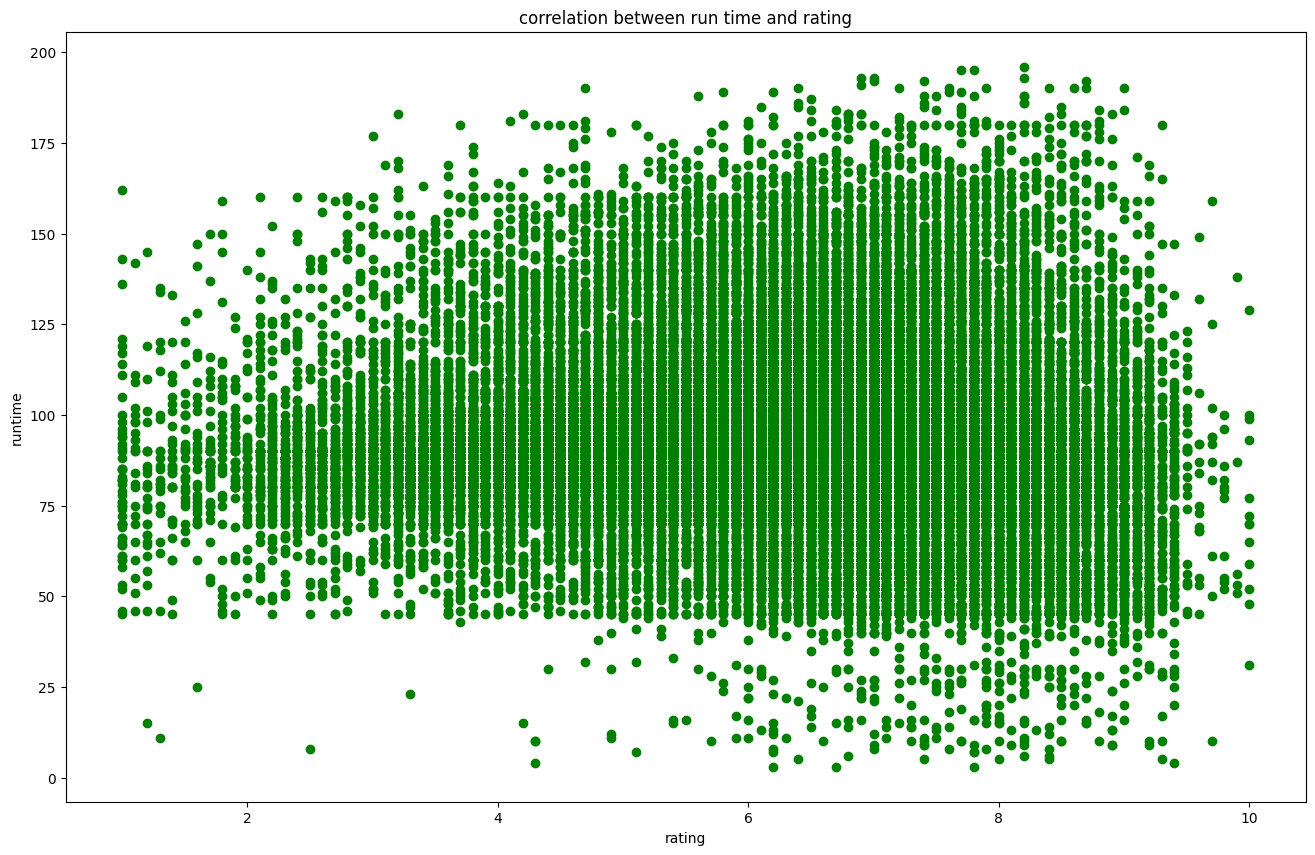

In [40]:
# checking for correlation
correlation = filtered_df['averagerating'].corr(filtered_df['runtime_minutes'])
print(correlation)
# plotting to identify the correlation between run time and ratings
plt.figure(figsize = (16, 10))
plt.scatter(filtered_df['averagerating'], filtered_df['runtime_minutes'], color = 'green')
plt.title('correlation between run time and rating')
plt.xlabel('rating')
plt.ylabel('runtime')

plt.show()

**Observation**

There is a very weak  negative correlation between the runtime of a movie and its rating. This means that change in runtime of a move has a very small or no impact on the rating of movie.

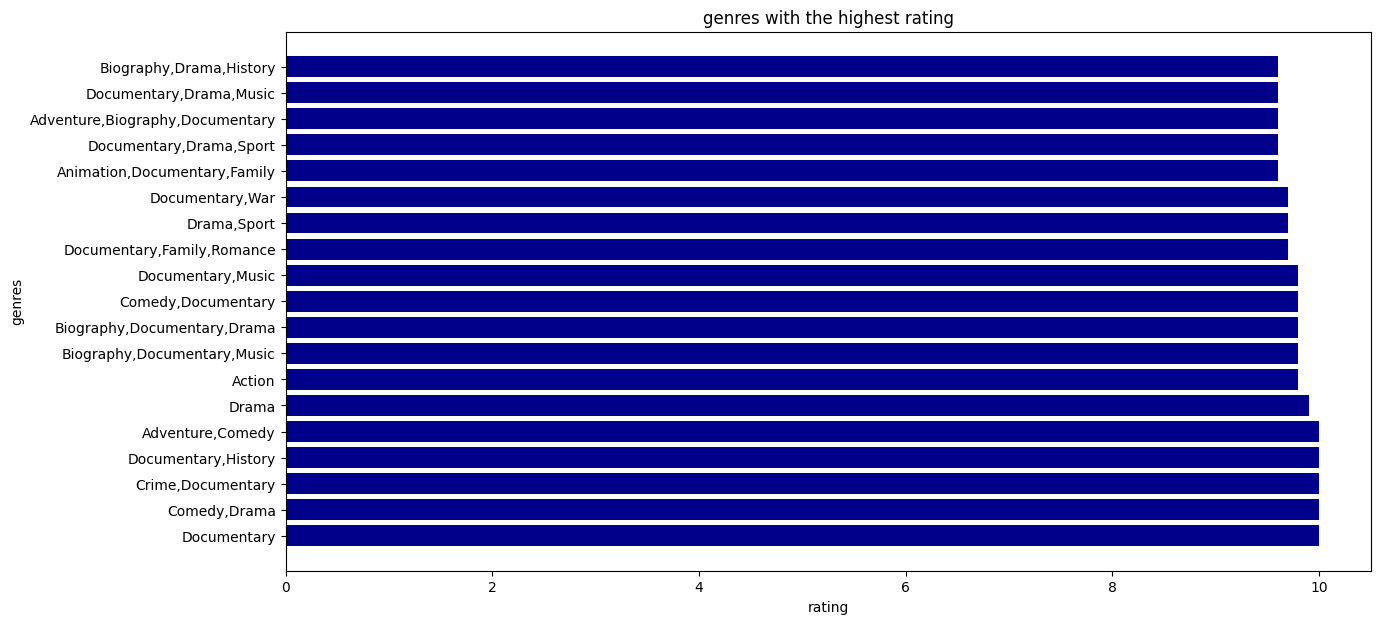

In [41]:
# Plotting a graph of genres with the highest rating
plt.figure(figsize = (14, 7))
best_genres = basics.nlargest(50,'averagerating')
plt.barh(best_genres['genres'], best_genres['averagerating'], color = 'darkblue', orientation='horizontal')
plt.title('genres with the highest rating')
plt.xlabel('rating')
plt.ylabel('genres')

plt.show()

**Observation**

The barh graph above show the top 50 genres with the highest ratings among which the Documentary genre has the highest rating.


<ipython-input-42-e055dbc30d95>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = common_genres.index, y = common_genres.values, palette = 'Blues_d')


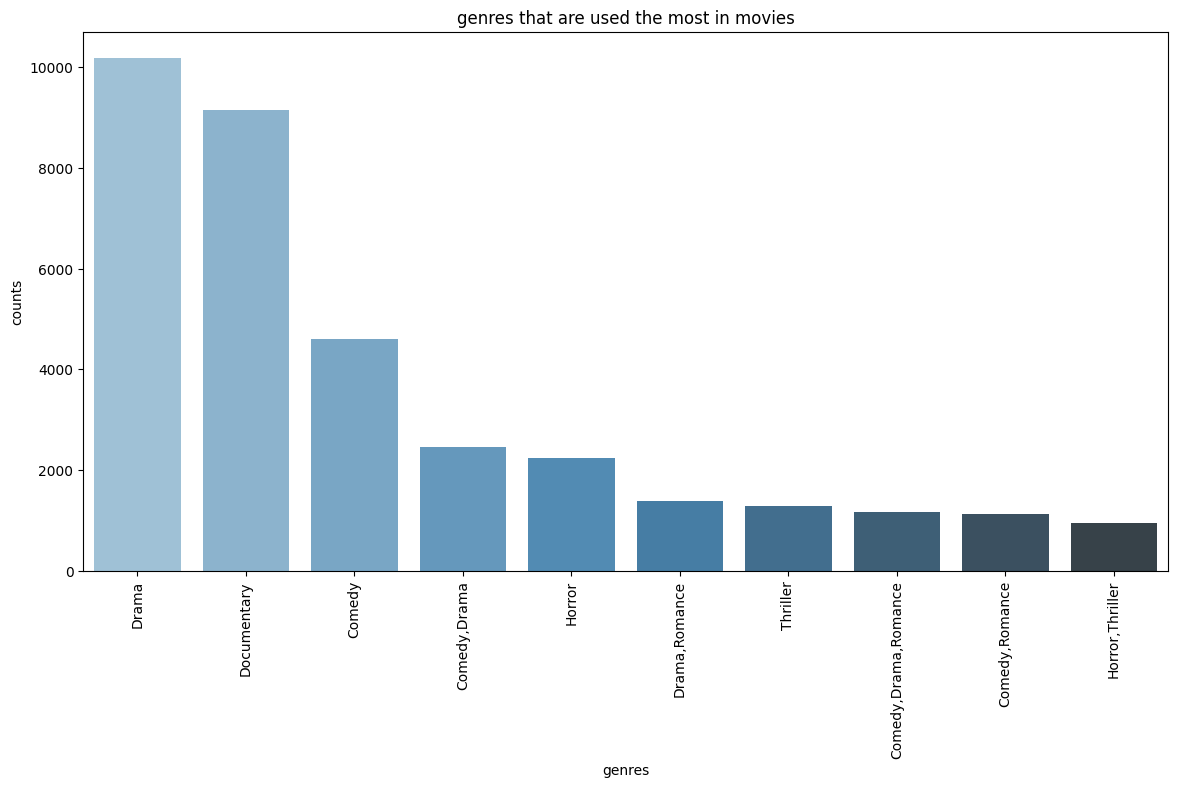

In [42]:
# plotting genres against count
plt.figure(figsize = (14, 7))
common_genres = basics['genres'].value_counts().head(10)
sns.barplot(x = common_genres.index, y = common_genres.values, palette = 'Blues_d')
plt.title('genres that are used the most in movies')
plt.xticks(rotation = 90)
plt.xlabel('genres')
plt.ylabel('counts')

plt.show()

**Observation**

The most common genre in movies is the Drama genre followed by the Documentary genre.

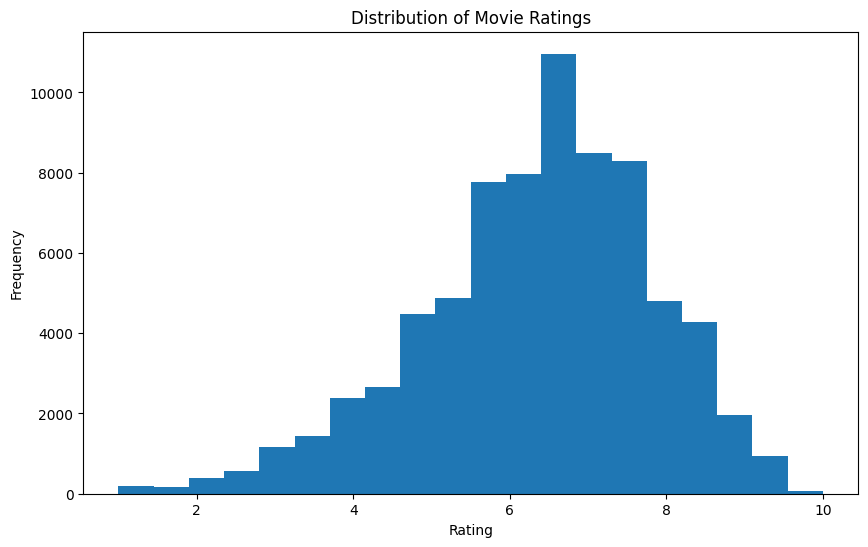

In [43]:
# Graph showing Distribution of Movie Ratings
query_ratings = """
SELECT averagerating, COUNT(*) AS frequency
FROM movie_ratings
WHERE averagerating IS NOT NULL
GROUP BY averagerating
ORDER BY averagerating;
"""
ratings_df = pd.read_sql_query(query_ratings, conn)
plt.figure(figsize=(10,6))
plt.hist(ratings_df['averagerating'], weights=ratings_df['frequency'], bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Observation**

The histogram above Shows that the movie ratings have a distribution that is left skewed. This means that the majority of the movie ratings are  around 7 while there are a few ratings that are smaller than 7.

**Modelling**

In this movie analysis project, we aim to develop a predictive model that can provide insights into various aspects of film performance, such as box office revenue, viewer ratings, popularity.

In [44]:
# Data exploration
Merged.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'Foreign_gross', 'popularity', 'vote_average',
       'vote_count', 'worldwide_Profit'],
      dtype='object')

In [45]:
# checking for the correlation between the following columns
cols = ['production_budget', 'domestic_gross', 'worldwide_gross', 'Foreign_gross', 'popularity', 'vote_average', 'vote_count', 'worldwide_Profit']
Merged[cols].corr(method = 'pearson')

,production_budget,domestic_gross,worldwide_gross,Foreign_gross,popularity,vote_average,vote_count,worldwide_Profit
production_budget,1.000000,0.730119,0.798942,0.799955,0.577006,0.145404,0.631831,0.685098
domestic_gross,0.730119,1.000000,0.945331,0.872533,0.546225,0.221270,0.719075,0.938683
worldwide_gross,0.798942,0.945331,1.000000,0.984156,0.575522,0.206759,0.736650,0.985450
Foreign_gross,0.799955,0.872533,0.984156,1.000000,0.565226,0.189448,0.712639,0.965973
popularity,0.577006,0.546225,0.575522,0.565226,1.000000,0.324053,0.722109,0.534026
vote_average,0.145404,0.221270,0.206759,0.189448,0.324053,1.000000,0.345254,0.209342
vote_count,0.631831,0.719075,0.736650,0.712639,0.722109,0.345254,1.000000,0.713697
worldwide_Profit,0.685098,0.938683,0.985450,0.965973,0.534026,0.209342,0.713697,1.000000


**Independent variables**: production_budget, popularity, vote_average.

**Dependent variable:** worldwide_profit

<Axes: xlabel='popularity', ylabel='worldwide_Profit'>

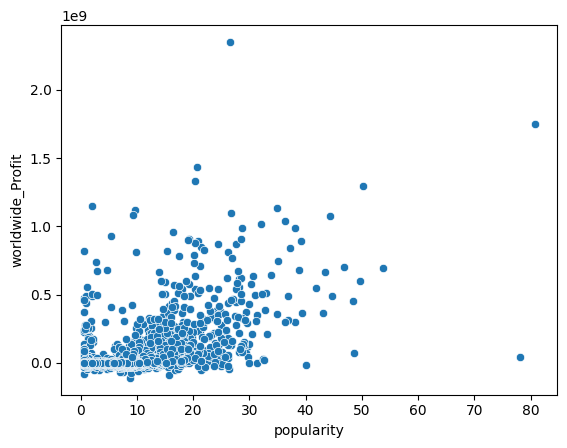

In [46]:
# A scatter plot showing the relationship between popularity and worldwide profit

sns.scatterplot(x='popularity',y='worldwide_Profit',data= Merged)

**Observation**

There is a positive correlation between popularity and worldwide profit. This means that as the popularity increases the worldwide profit also increases.

In [47]:
# importing the necessary library
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Standardizing the columns that we'll use for modelling
cols = Merged.select_dtypes(include=['float64', 'int64']).columns
# standardization
Merged[cols] = scaler.fit_transform(Merged[cols])

In [48]:
#splitting our dataset into train and test splits
from sklearn.model_selection import train_test_split

X = Merged[['production_budget', 'popularity', 'vote_average']].values
y = Merged['worldwide_Profit'].values

# Use 20% of the data as test
# The rest will be our training set
X_train, X_test, profit_train, profit_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
# Building the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, profit_train)


# display the intercept bias
print(model.intercept_)

# display the coefficient
print(model.coef_)

0.004326513459083237
[0.58455533 0.1779396  0.07377484]


**Observations**


A larger coefficient; 0.57840773 for a production budget feature indicates an increase in production budget would lead to more profits, all other things being constant.  
The smaller coefficient  0.2059154 means that the popularity is less critical and has less impact in increasing the profit of the film industry.

In [50]:
#comparing actual profit and predicted profit
profit_predict = model.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': profit_test.flatten(), 'Predicted': profit_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,385.000000,385.000000
mean,0.049094,0.070716
std,1.049296,0.818996
min,-0.932313,-0.885788
25%,-0.453940,-0.432962
50%,-0.377634,-0.198817
75%,0.023747,0.227020
max,6.578560,4.642126


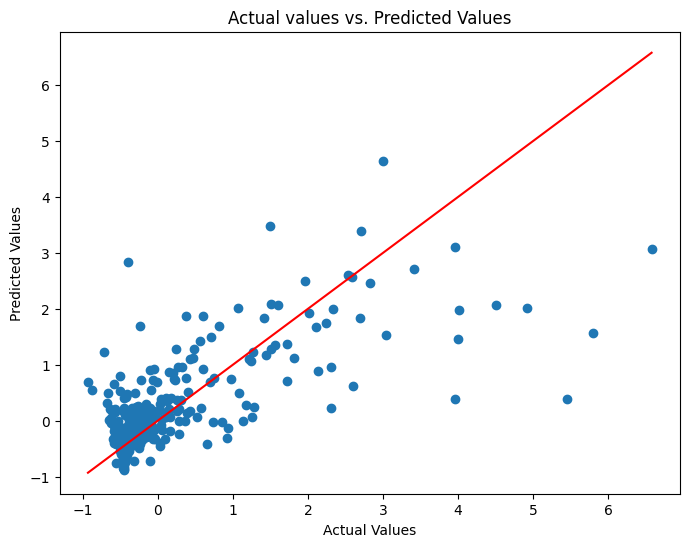

In [51]:
# plotting the actual values versus the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(profit_test, profit_predict)
plt.plot([profit_test.min(), profit_test.max()], [profit_test.min(), profit_test.max()], color='red')  # Line of perfect predictions
plt.title('Actual values vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()


**Observation**

The data points are scattered around the red diagonal line, which represents an ideal model where predictions match actual values perfectly.

There is a concentration of data points in the lower range (close to zero) for both actual and predicted values, suggesting that the model has more data in this range.

As the values increase, the predicted values tend to deviate more from the actual values, with some outliers that are significantly higher than the actual values.

The scatter suggests that the model may struggle with higher values, leading to increased error or underestimation at certain points, especially for predictions beyond 3.

In [52]:
# metrics of accuracy
from sklearn import metrics
import numpy as np
# First metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(profit_test, profit_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(profit_test, profit_predict))

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(profit_test, profit_predict)))

Mean Absolute Error: 0.40271883964963806
Mean Squared Error: 0.5161854059018703
Root Mean Squared Error: 0.7184604414314475


**Observation**

The relatively low values of MAE, MSE, and RMSE indicate that the model is making reasonably accurate predictions. The small difference between MAE and RMSE shows that there are not many large outliers in the errors, meaning the model's performance is consistent and not heavily influenced by a few large errors. However, further improvements could focus on reducing these error metrics to increase prediction accuracy.








**Recommendations**

Based on the data explorations above we would give the following recommendations;

1. Invest in High Budgets: Prioritize larger budgets to increase domestic and worldwide returns.

2. Focus on Popular Genres: Allocate resources towards producing high-rated genres
like Drama and Documentary.

3. Boost Marketing for Popularity: Invest in pre-release marketing to drive up
popularity, which correlates strongly with box office performance.

**Summary**

In this notebook, we successfully examined the datasets and gained a deeper understanding of them. We conducted exploratory data analysis, which allowed us to derive insights that can be used to make informed effective business decisions.